<a href="https://colab.research.google.com/github/DanielleFuenzalida/Proyecto-final-Agosto-2025/blob/main/Housingipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

**Abstracto**

Adquirir una propiedad es uno de los principales objetivos financieros de muchas personas. El mercado inmobiliario ofrece precios atractivos mediante campañas publicitarias que resaltan beneficios como ubicación estratégica, financiamiento flexible y alta plusvalía. Sin embargo, la decisión de compra requiere un análisis exhaustivo que considere factores como la ubicación, el estado del inmueble, las comodidades y el contexto económico.
En este estudio, trabajaremos con un dataset de precios de viviendas para modelar y predecir el valor de las propiedades en función de sus características. El análisis combina técnicas de regresión y comparación de modelos con el fin de mejorar la precisión de las estimaciones.
Audiencia: agentes inmobiliarios, desarrolladores de plataformas de compraventa, analistas de mercado y potenciales compradores que busquen entender qué factores impactan más en el precio.

**Problema**

El precio de una vivienda depende de múltiples factores: ubicación, superficie, número de habitaciones y baños, presencia de comodidades (aire acondicionado, estacionamiento, amueblado), entre otros. Por ejemplo, una casa ubicada sobre una avenida principal podría tener un precio mayor que otra en una zona menos transitada, pero con mejores acabados y mobiliario completo.
La dificultad radica en estimar de manera precisa el valor de un inmueble considerando simultáneamente todas estas variables y su interacción, para así tomar decisiones de compra o inversión más informadas.

 **Objetivo**

Aplicar modelos de regresión para:

Predecir el precio de una vivienda según sus características.

Identificar las variables que más influyen en el valor de la propiedad.

Evaluar la precisión de distintos modelos y seleccionar el más eficiente.


 **Hipótesis**

Las viviendas con mayor superficie construida tienden a tener precios significativamente más altos.

La presencia de comodidades como aire acondicionado, estacionamiento o amueblado aumenta de forma notable el valor

Influye más la ubicación (por ejemplo, en calle principal) o el número de habitaciones en la fijación del precio

¿Qué modelo de Machine Learning ofrece la mejor capacidad predictiva en este contexto: Regresión Lineal o Random Forest/XGBoost?




# Datos

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Cargar dataset
# Monta tu Google Drive para acceder al archivo.
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Preentrega1 /Housing.csv')  # Cambia la ruta si estás en local
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import gdown
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from scipy.stats import skew
from sklearn.model_selection import train_test_split
import time
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


El dataset contiene 545 registros y 13 columnas, divididas en :


*   6 variables numéricas (int64): incluyen datos como el precio, área, número de habitaciones y baños.


*   7 variables categóricas (object): representan características cualitativas como si la casa tiene aire acondicionado o si está en una zona preferencial.



*   No hay valores nulos, lo que facilita el análisis y modelado.

*   Price  (precio en dólares estadounidenses) será la variable objetivo del estudio. Se analizará su relación con variables como bathrooms, área, bedrooms y otros atributos de las viviendas.




**Exploración de datos:**



*   histogramas, boxplots y scatter plots para visualizar distribuciones y tendencias.
*  Correlación entre variables: verificar qué factores influyen más en el precio.

* Transformación de variables categóricas: convertirlas en valores numéricos para modelos predictivos.

* Modelado con regresión: evaluar qué tan bien las características explican el precio de las viviendas.





In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


# Análisis Estadístico Detallado:

Análisis Estadístico Detallado:

1. Price (Precio en dólares estadounidenses)

Promedio (mean): $4,766,729


Desviación estándar (std): $1,870,440

Valor mínimo (min): $1,750,000

Valor máximo (max): $13,300,000

**Percentiles:**

El 25% de las casas tienen un precio por debajo de $3,430,000.

El 50% (mediana) tiene un precio por debajo de $4,340,000, lo que indica que la mayoría de las casas están en ese rango de precio.

El 75% de las casas cuestan menos de $5,740,000, lo que significa que una cuarta parte de las propiedades son mucho más caras.

2. Area (Área en pies cuadrados)

Promedio: 5,150.54 pies cuadrados

Desviación estándar: 2,170.14 pies cuadrados

Valor mínimo: 1,650 pies cuadrados

Valor máximo: 16,200 pies cuadrados

 **Percentiles:**

El 25% de las casas tienen un área de 3,600 pies cuadrados o menos.

El 50% (mediana) tiene un área de 4,600 pies cuadrados.

El 75% de las viviendas tienen un área inferior a 6,360 pies cuadrados.

3. Bedrooms (Número de habitaciones)

Promedio: 2.97 habitaciones

Desviación estándar: 0.74

Valor mínimo: 1 habitación

Valor máximo: 6 habitaciones

 **Percentiles:**

El 25% de las casas tienen 2 habitaciones o menos.

El 50% tiene 3 habitaciones, que parece ser lo más común.

El 75% de las casas tienen 3 habitaciones o menos.


4. Bathrooms (Número de baños)

Promedio: 1.29 baños

Desviación estándar: 0.50

Valor mínimo: 1 baño

Valor máximo: 4 baños

**Percentiles**:

El 25% de las viviendas tienen 1 baño o menos.
El 50% tiene 1 baño.
El 75% tiene hasta 2 baños, lo que refleja que las casas con más de un baño son comunes, pero aún así la mayoría tiene solo 1 baño.

5. Stories (Número de pisos)

Promedio: 1.81 pisos

Desviación estándar: 0.87

Valor mínimo: 1 piso

Valor máximo: 4 pisos

Percentiles:

El 25% de las casas tienen 1 piso.

El 50% tiene 2 pisos, lo que es bastante común.

El 75% también tiene 2 pisos o menos, lo que sugiere que las viviendas con más
de 2 pisos son menos frecuentes.

6. Parking (Número de espacios de estacionamiento)

Promedio: 0.69 espacios de estacionamiento

Desviación estándar: 0.86

Valor mínimo: 0 espacios

Valor máximo: 3 espacios

Percentiles:

El 25% de las viviendas no tienen espacios de estacionamiento (0 espacios).

El 50% también no tiene espacio de estacionamiento.

El 75% de las viviendas tienen 0 o 1 espacio de estacionamiento.




**Descripción del análisis**



Las características de una vivienda influyen significativamente en su valor de mercado.
 A continuación, se detallan algunos factores
 clave:

Superficie construida: Generalmente, una mayor área construida se asocia con un precio promedio más alto.


Número de habitaciones y baños: Las viviendas con más habitaciones y baños suelen tener un valor superior en comparación con aquellas que disponen de solo un dormitorio y un baño.

Disponibilidad de estacionamiento: Las casas que cuentan con estacionamiento tienden a tener un precio más elevado.


Número de pisos: Las viviendas de varios pisos suelen tener un valor más alto que las de una sola planta.


Además de estas características, otros factores como la ubicación, comodidades y el estado de conservación de la propiedad también influyen en su valoración
Analizamos según  Price - Area - Bedrooms - Bathrooms -Stories- Mainroad - Guestroom - Basement - Hot water heating - Airconditioning - Parking - Prefarea - Furnishing status




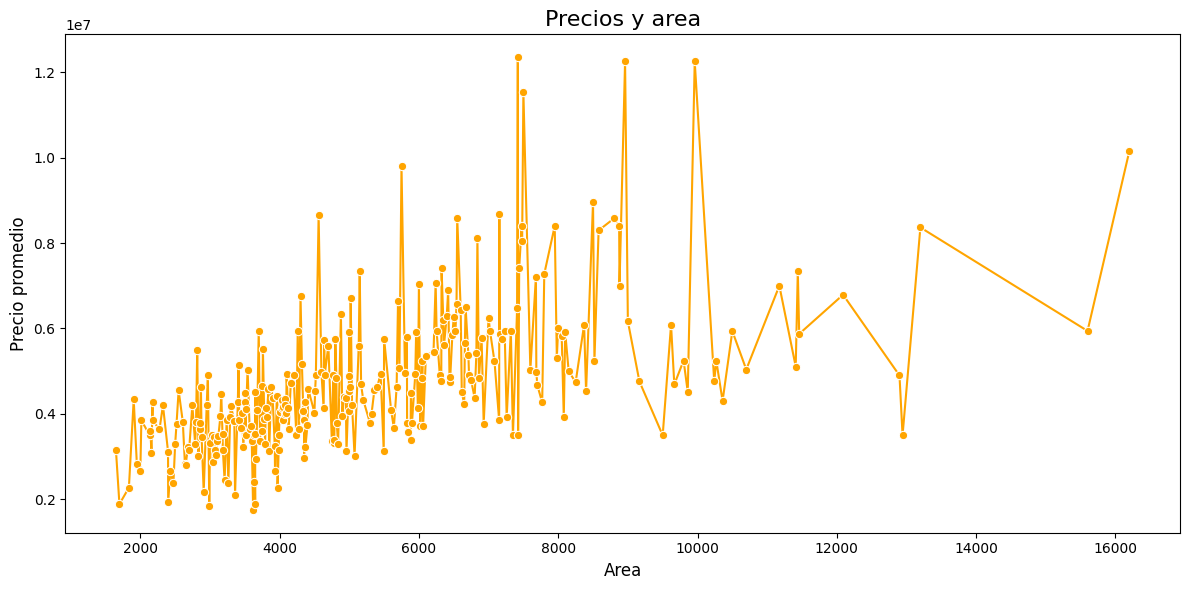

In [7]:
price_by_year = df.groupby('area')['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=price_by_year, x='area', y='price', marker='o', color='orange')
plt.title('Precios y area', fontsize=16)
plt.xlabel('Area', fontsize=12)
plt.ylabel('Precio promedio', fontsize=12)
plt.tight_layout()
plt.show()

Las viviendas más caras tienden a ser más grandes, pero hay una variabilidad considerable en los precios debido a factores como ubicación, calidad de la construcción, etc.


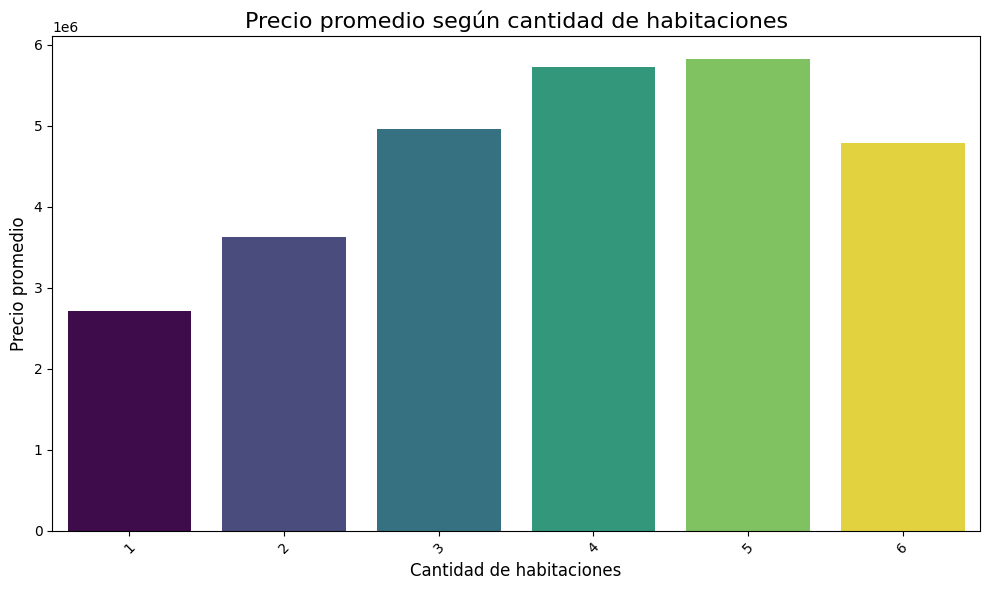

In [8]:
bedrooms_price = df.groupby('bedrooms')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=bedrooms_price, x='bedrooms', y='price', hue='bedrooms', palette='viridis', dodge=False)
plt.legend([], [], frameon=False)  # Remueve la leyenda generada automáticamente
plt.title('Precio promedio según cantidad de habitaciones', fontsize=16)
plt.xlabel('Cantidad de habitaciones', fontsize=12)
plt.ylabel('Precio promedio', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La mayoría de las viviendas tienen entre 4 y 5 habitaciones por lo que el promedio es relevante

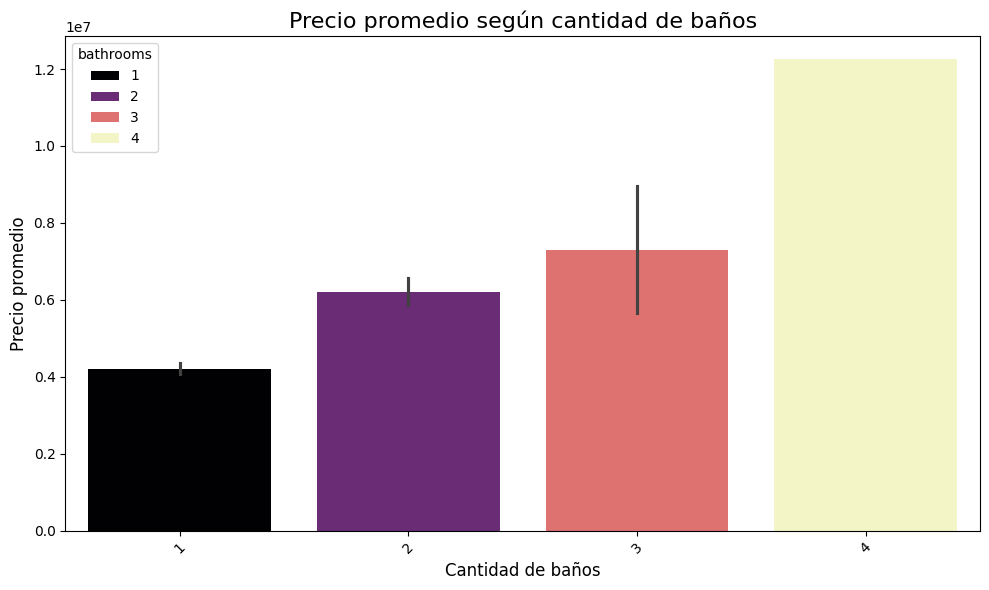

In [9]:
df['bathrooms'] = df['bathrooms'].round().astype(int)  # Redondeamos y convertimos a entero

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='bathrooms', y='price', palette='magma', hue = 'bathrooms') # Changed df to Housing
plt.title('Precio promedio según cantidad de baños', fontsize=16)
plt.xlabel('Cantidad de baños', fontsize=12)
plt.ylabel('Precio promedio', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 Las casas con 1 baño o menos parecen ser más frecuentes. Mientras que las casas conb 4 baños es mucho más frecuente


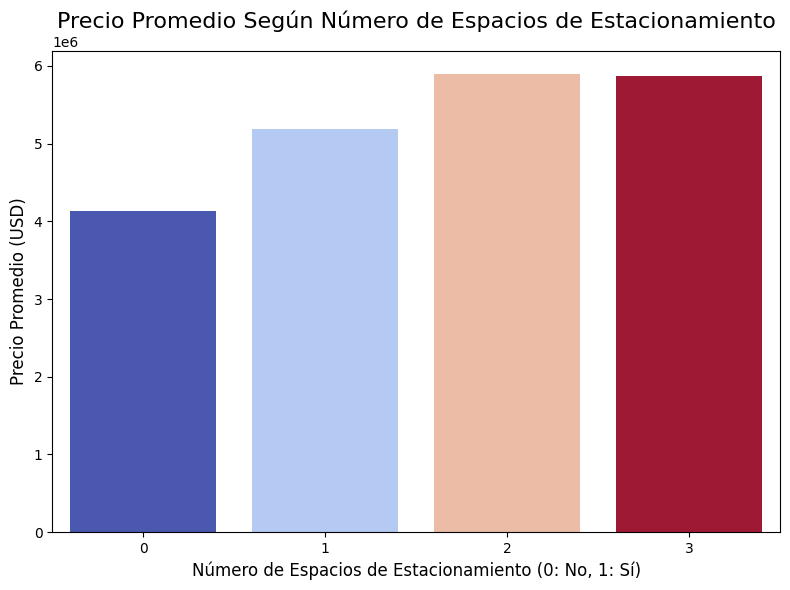

In [10]:
# Agrupar por 'parking' y calcular el precio promedio
parking = df.groupby('parking')['price'].mean().reset_index()

# Crear gráfico
plt.figure(figsize=(8, 6))
sns.barplot(data=parking, x='parking', y='price', hue='parking', palette='coolwarm', dodge=False)
plt.legend([], [], frameon=False)  # Desactivar leyenda
plt.title('Precio Promedio Según Número de Espacios de Estacionamiento', fontsize=16)
plt.xlabel('Número de Espacios de Estacionamiento (0: No, 1: Sí)', fontsize=12)
plt.ylabel('Precio Promedio (USD)', fontsize=12)
plt.tight_layout()
plt.show()


Falta de estacionamiento

La mayoría de las viviendas en este dataset no cuentan con espacio de estacionamiento, lo que podría ser un factor relevante en ciertas ubicaciones o tipos de viviendas.

Pocas viviendas con más de 1 espacio de estacionamiento: La mayoría de las casas solo tienen un espacio, y unas pocas cuentan con más, lo que refleja una oferta limitada en cuanto a estacionamiento.

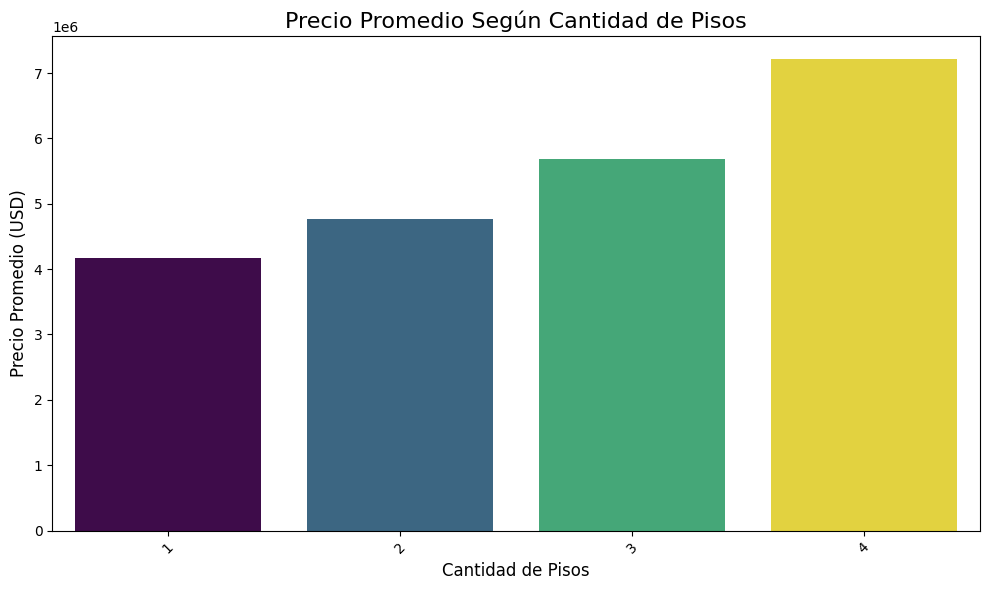

In [11]:

stories_price = df.groupby('stories')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=stories_price, x='stories', y='price', hue='stories', palette='viridis', dodge=False)
plt.legend([], [], frameon=False)  # Remueve la leyenda generada automáticamente
plt.title('Precio Promedio Según Cantidad de Pisos', fontsize=16)
plt.xlabel('Cantidad de Pisos', fontsize=12)
plt.ylabel('Precio Promedio (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


La mayoría de las viviendas son de 1 o 2 pisos, algunas llegan hasta 4 pisos por lo que el valor es más alto.

# Outliers

In [13]:
def calcular_outliers_iqr(df):
    """
    Calcula el porcentaje de outliers para las columnas numéricas de un DataFrame
    utilizando el criterio del rango intercuartílico (IQR), excluyendo variables binarias.

    Args:
        df (pd.DataFrame): DataFrame de entrada.

    Returns:
        pd.DataFrame: DataFrame con columnas numéricas y su porcentaje de outliers,
                      ordenadas en orden decreciente.
    """
    resultados = []

    for columna in df.select_dtypes(include='number').columns:
        # Excluir variables binarias
        if df[columna].nunique() == 2:
            continue

        q1 = df[columna].quantile(0.25)
        q3 = df[columna].quantile(0.75)
        iqr = q3 - q1
        limite_inferior = q1 - 1.5 * iqr
        limite_superior = q3 + 1.5 * iqr

        # Calcular el porcentaje de outliers
        outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
        porcentaje_outliers = (len(outliers) / len(df)) * 100
        resultados.append((columna, porcentaje_outliers))

    # Convertir a DataFrame y ordenar por porcentaje de outliers
    outliers_df = pd.DataFrame(resultados, columns=['Columna', 'Porcentaje_Outliers'])
    outliers_df = outliers_df[outliers_df['Porcentaje_Outliers'] > 0]
    outliers_df = outliers_df.sort_values(by='Porcentaje_Outliers', ascending=False).reset_index(drop=True)

    return outliers_df

In [14]:
calcular_outliers_iqr(df)

,Columna,Porcentaje_Outliers
0,stories,7.522936
1,price,2.752294
2,area,2.201835
3,bedrooms,2.201835
4,parking,2.201835
5,bathrooms,0.183486


In [15]:
outliers_df = calcular_outliers_iqr(df)

In [16]:
def plot_boxplot_outliers(df, columnas_outliers):
    """
    Genera un gráfico boxplot vertical de las variables con outliers,
    normalizando previamente los datos con RobustScaler.

    Args:
        df (pd.DataFrame): DataFrame con los datos.
        outlier_columns (list): Lista de columnas con outliers.

    Returns:
        None
    """
    # Normalizá las columnas con outliers
    scaler = MinMaxScaler()
    df_normalized = df.copy()
    df_normalized[columnas_outliers] = scaler.fit_transform(df[columnas_outliers]) # Fixed indentation

    # Configuración del gráfico
    plt.figure(figsize=(len(columnas_outliers) * 2, 10))
    sns.boxplot(data=df_normalized[columnas_outliers], orient='v')

    # Ajustes finales del gráfico
    plt.title('Boxplot de Variables con Outliers (Normalizadas)', fontsize=14)
    plt.ylabel('Valor Normalizado', fontsize=12)
    plt.xlabel('Variables', fontsize=12)
    plt.tight_layout()
    plt.show()

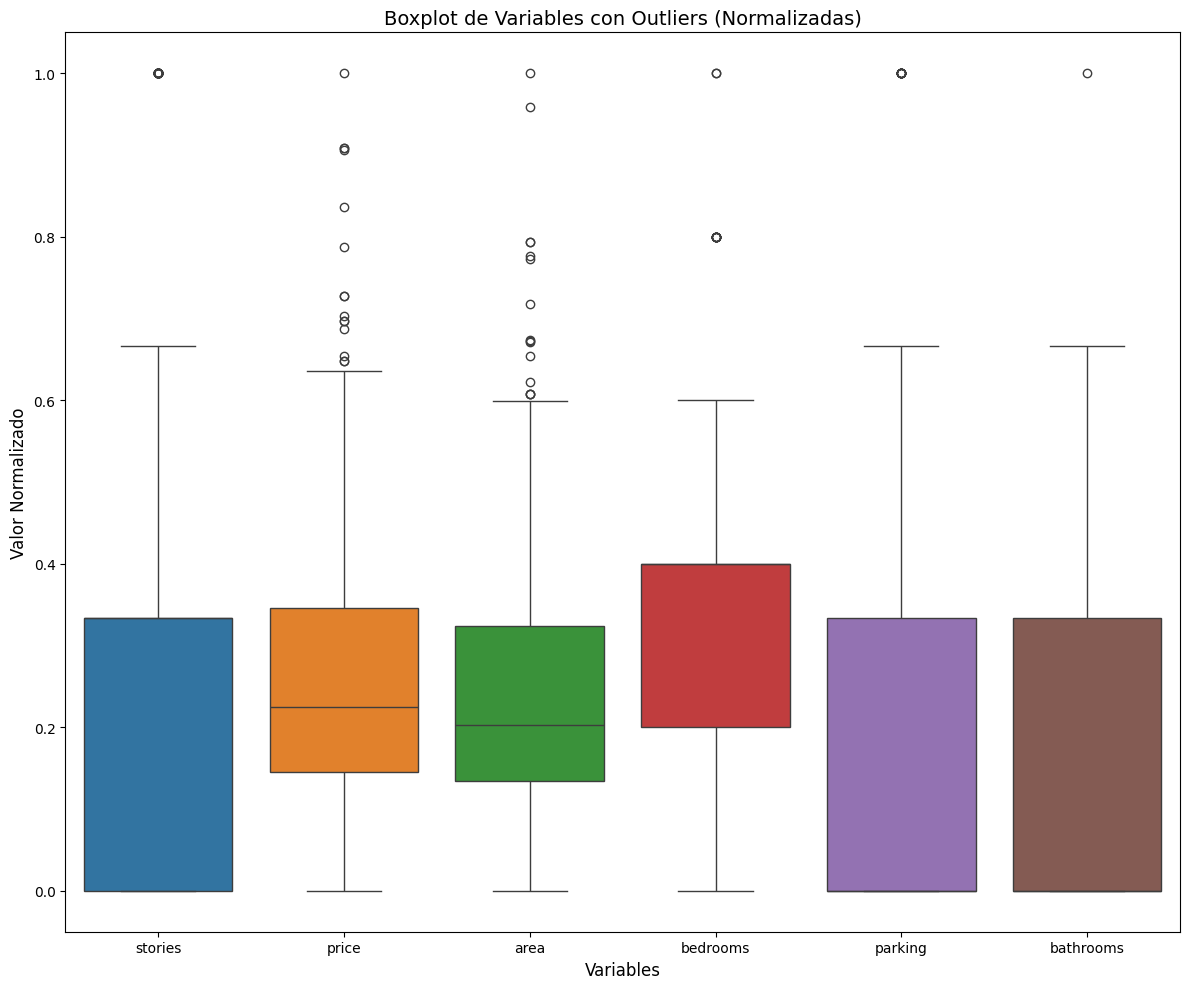

In [17]:
# In cell ipython-input-29-612b70e265b3, change:
# outliers_df = calcular_outliers_iqr(df)
outliers_Housing = calcular_outliers_iqr(df) # Assign to outliers_Housing

# Then, in cell ipython-input-34-612b70e265b3, use outliers_Housing:
columnas_outliers = outliers_Housing['Columna'].tolist()
plot_boxplot_outliers(df, columnas_outliers)

**Análisis de los Outliers**

1. Stories (Número de pisos) - 7.52% Outliers

Un porcentaje del 7.52% de las viviendas tiene un número de pisos inusualmente alto o bajo.

Esto significa que, aunque la mayoría de las viviendas tienen entre 1 y 3 pisos, hay algunas propiedades que se desvían significativamente de este patrón, con 4 o más pisos, o posiblemente con menos de 1 (poco habitual).

2. Price (Precio) - 2.75% Outliers

El 2.75% de las viviendas tienen precios que son considerados outliers, lo que significa que son significativamente más altos o más bajos en comparación con el resto de las propiedades.

Este pequeño porcentaje de outliers en el precio es relativamente bajo, pero aún así es importante prestarle atención, ya que estas viviendas pueden representar propiedades únicas o excepcionales.

3. Area (Área) - 2.20% Outliers

El área presenta un pequeño porcentaje de valores atípicos (aproximadamente el 2.20%).

Esto sugiere que hay algunas propiedades con áreas significativamente mayores o menores que el resto de las viviendas en el dataset.

Las propiedades con un área excepcionalmente grande o pequeña pueden desentonar con las propiedades típicas, pero podrían tener un impacto considerable en el análisis del precio.

4. Bedrooms (Número de habitaciones) - 2.20% Outliers

El 2.20% de las viviendas muestran outliers en el número de habitaciones. Esto significa que una pequeña fracción de las propiedades tiene una cantidad inusualmente alta o baja de habitaciones en comparación con el resto de los datos.

Un número inusual de habitaciones puede estar relacionado con propiedades de tamaños especiales (como casas muy grandes o extremadamente pequeñas) que no se ajustan a la distribución general de las viviendas en el conjunto de datos.


5. Parking (Número de espacios de estacionamiento) - 2.20% Outliers

El 2.20% de las viviendas presentan outliers en el número de espacios de estacionamiento, lo que indica que hay propiedades con una cantidad inusualmente alta o baja de espacios disponibles para estacionamiento en comparación con el resto del dataset.

Algunas viviendas pueden tener más espacios de estacionamiento de los que se consideran típicos (por ejemplo, propiedades con estacionamiento para varios vehículos o áreas comerciales), lo que las convierte en casos excepcionales.


6. Bathrooms (Número de baños) - 0.18% Outliers

Con solo un 0.18% de outliers en la variable "número de baños", los valores de esta característica son relativamente consistentes en la mayoría de las viviendas. Esto sugiere que el número de baños no presenta variaciones extremas, lo que es típico en muchas propiedades residenciales.

Aunque el porcentaje de outliers es bajo, siempre es importante considerarlos, especialmente cuando se están construyendo modelos predictivos, ya que incluso pequeños impactos pueden influir en los resultados.

In [18]:
def calcular_porcentaje_nulos(df):
    """
    Calcula el porcentaje de valores nulos por columna y devuelve las columnas
    con valores nulos en orden decreciente según el porcentaje.

    Args:
    df (pd.DataFrame): DataFrame a analizar.

    Returns:
    pd.DataFrame: DataFrame con columnas `columna` y `porcentaje_nulos`.
    """
    # Calcular porcentaje de nulos
    porcentaje_nulos = df.isnull().mean() * 100

    # Filtrar columnas con nulos y ordenar en orden decreciente
    nulos_df = (porcentaje_nulos[porcentaje_nulos > 0]
                .sort_values(ascending=False)
                .reset_index())
    nulos_df.columns = ['columna', 'porcentaje_nulos']

    return nulos_df

In [19]:
# In cell ipython-input-60-13a5cc9d4fb2, change:
# calcular_porcentajes_nulos(Housing)
calcular_porcentaje_nulos(df) # Use the correct function name

,columna,porcentaje_nulos


In [20]:
def imputar_valores_nulos(data, columnas_outliers):
    """
    Imputa los valores nulos en el DataFrame según las reglas especificadas:
    - Para las variables numéricas:
        - Si no tiene outliers, se imputa con la media.
        - Si tiene outliers, se imputa con la mediana.
    - Para las variables categóricas, se imputa con la moda.

    Parámetros:
        data (pd.DataFrame): El DataFrame de entrada con los valores nulos.
        columnas_outliers (list): Lista con los nombres de las columnas con outliers.

    Devuelve:
        pd.DataFrame: El DataFrame con los valores nulos imputados.
    """
    for col in data.columns:
        if data[col].dtype == 'object':  # Categóricas
            # Imputar con la moda para columnas categóricas
            moda = data[col].mode()[0]
            data[col] = data[col].fillna(moda)

        else:  # Numéricas
            if col in columnas_outliers:
                # Imputar con la mediana si la columna tiene outliers
                mediana = data[col].median()
                data[col] = data[col].fillna(mediana)
            else:
                # Imputar con la media si la columna no tiene outliers
                media = data[col].mean()
                data[col] = data[col].fillna(media)

    return data

Columnas con datos nulos

In [21]:
def eliminar_columnas_irrelevantes(data):
    """
    Elimina columnas irrelevantes del DataFrame.
    - Elimina columnas con un solo valor.
    - Elimina columnas específicas como 'id' y 'year'.

    Parámetros:
        data (pd.DataFrame): El DataFrame que contiene las variables a procesar.

    Devuelve:
        pd.DataFrame: El DataFrame con las columnas irrelevantes eliminadas.
    """
    # Eliminar columnas con un solo valor
    columnas_a_eliminar = [col for col in data.columns if len(data[col].unique()) == 1]

    # Eliminamos las columnas del DataFrame
    data = data.drop(columns=columnas_a_eliminar, axis=1)

    return data

In [22]:
print(df.nunique())

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64


In [23]:
df= eliminar_columnas_irrelevantes(df)



Correlaciones entre variables: Es importante explorar la relación entre el precio y las variables como el área, el número de habitaciones, baños y pisos.

Visualización de distribuciones: Utilizar gráficos como histogramas o boxplots para entender mejor la distribución de estas variables.

Modelo de regresión: Evaluar cómo las características de las viviendas (área, número de habitaciones, etc.) pueden predecir su precio.

```
# Tiene formato de código
```



# Matriz de correlación


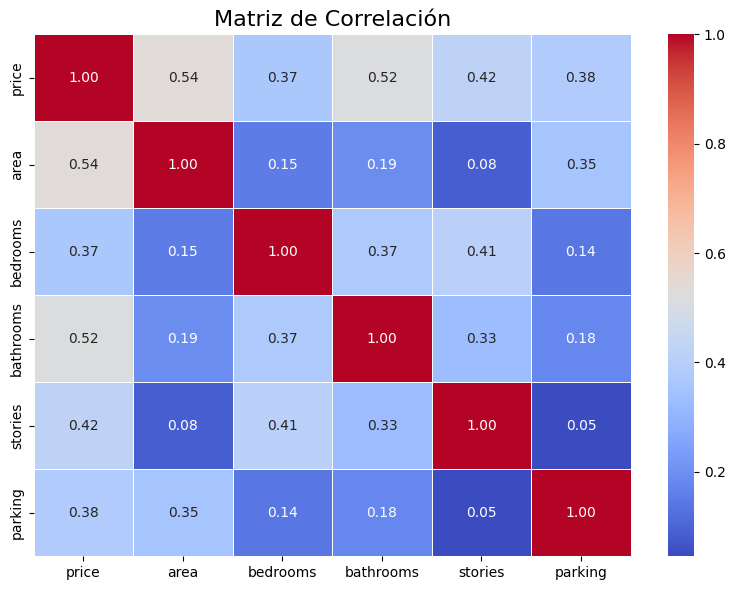

In [25]:
# Calcular la correlación entre las variables numéricas
corr_matrix = df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']].corr()

# Crear gráfico de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación', fontsize=16)
plt.tight_layout()
plt.show()

# Histogramas

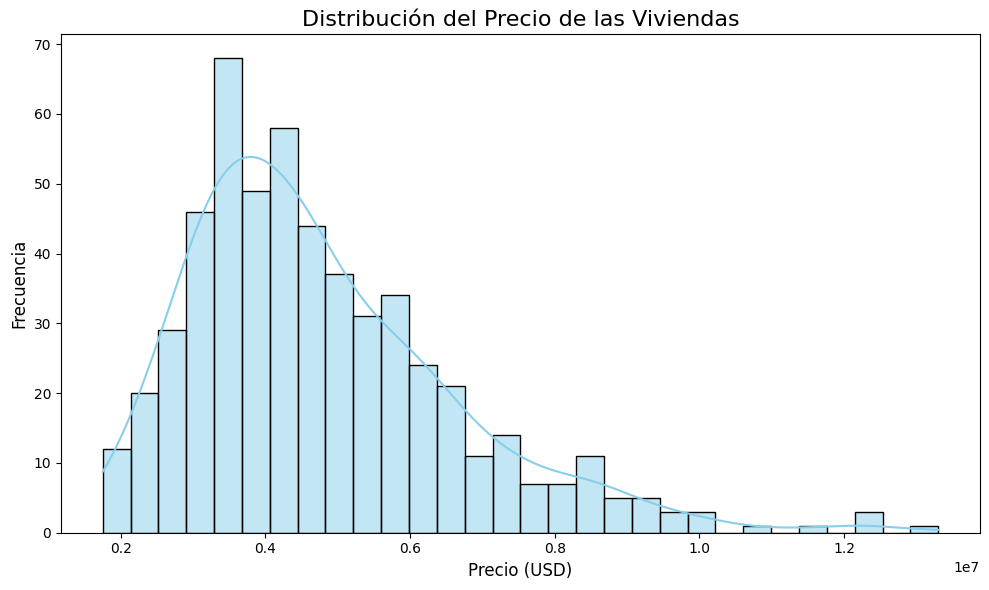

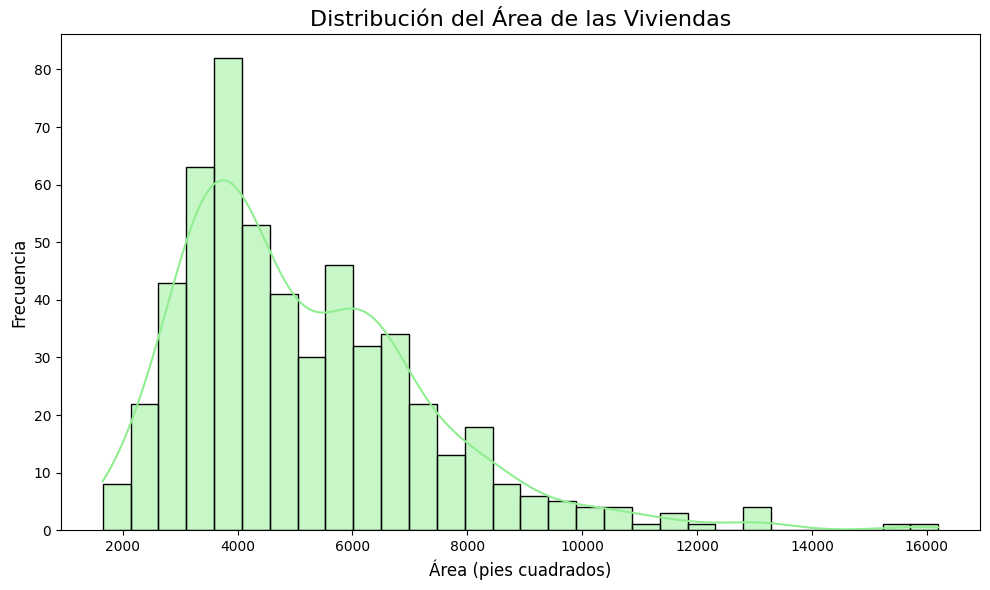

In [29]:
# Histograma de precios
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True, color='skyblue')
plt.title('Distribución del Precio de las Viviendas', fontsize=16)
plt.xlabel('Precio (USD)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.tight_layout()
plt.show()

# Histograma del área
plt.figure(figsize=(10, 6))
sns.histplot(df['area'], bins=30, kde=True, color='lightgreen')
plt.title('Distribución del Área de las Viviendas', fontsize=16)
plt.xlabel('Área (pies cuadrados)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1643348568.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='stories', y='price', palette='viridis')


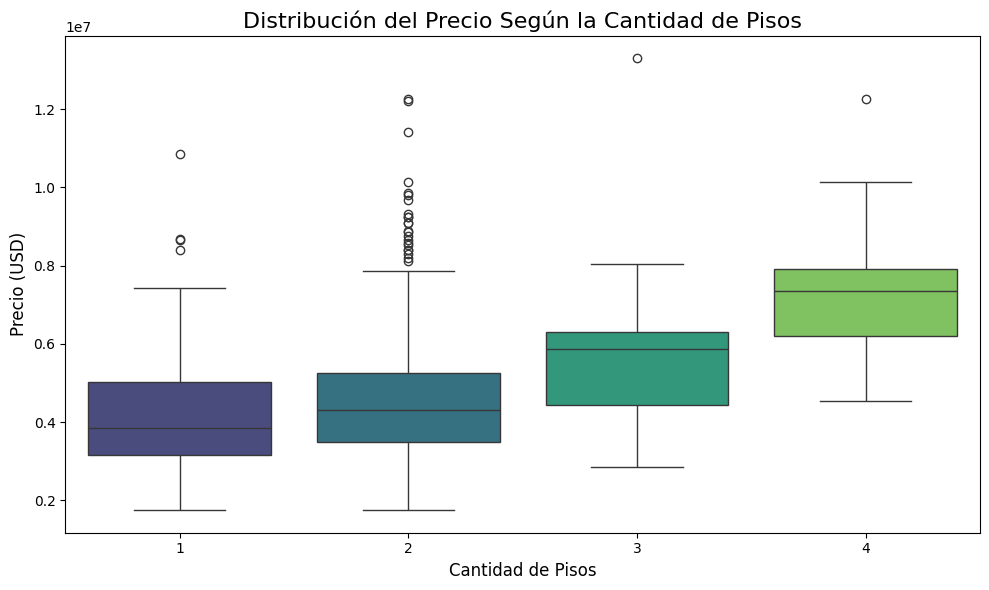

In [31]:
# Boxplot para explorar la dispersión del precio según el número de pisos
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='stories', y='price', palette='viridis')
plt.title('Distribución del Precio Según la Cantidad de Pisos', fontsize=16)
plt.xlabel('Cantidad de Pisos', fontsize=12)
plt.ylabel('Precio (USD)', fontsize=12)
plt.tight_layout()
plt.show()


Modelos a entrenar


*   Regresión lineal
*   Random Forest






In [32]:
semilla = 197507

In [33]:
# X será todo menos la columna 'Status' (la target)
X = df.drop(columns=['price'])

# y será la columna 'Status' (la target)
y = df['price']

# Realizamos el split 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=semilla)

# Verificamos el tamaño de los datos
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")

Tamaño de X_train: (381, 12)
Tamaño de X_test: (164, 12)
Tamaño de y_train: (381,)
Tamaño de y_test: (164,)


In [34]:
column_names = ["Modelo", "R^2", "MAE", "MSE", "RMSE", "Tiempo"]
resultados_df = pd.DataFrame(columns=column_names)

In [35]:
# Función para guardar los resultados
def guardo_resultados(nombre_modelo, y_test, y_pred, tiempo_ejecucion):
    # Importar métricas de evaluación para regresión
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
    import numpy as np

    # Calcular las métricas
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Crear un diccionario con los resultados
    resultados_dict = {
        'Modelo': [nombre_modelo],
        'R^2': [r2],
        'MAE': [mae],
        'MSE': [mse],
        'RMSE': [rmse],
        'Tiempo': [tiempo_ejecucion]
    }

    # Convertir el diccionario a un DataFrame
    resultados_df = pd.DataFrame(resultados_dict)

    # Eliminar columnas vacías o todas NA
    resultados_df = resultados_df.dropna(axis=1, how='all')

    return resultados_df

In [36]:
def plot_predictions_vs_actuals(y_test, y_pred):
    # Crear un DataFrame con las predicciones y los valores reales
    df = pd.DataFrame({'Real': y_test, 'Predicted': y_pred})

    # Establecer el estilo de seaborn
    sns.set(style="whitegrid")

    # Crear el gráfico de dispersión
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x='Real', y='Predicted', color='blue', alpha=0.6, label='Predicciones', s=80)

    # Añadir la línea de referencia y=x
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Línea y=x')

    # Añadir título y etiquetas
    plt.title('Valores Reales vs Predicciones', fontsize=12)
    plt.xlabel('Valores Reales', fontsize=10)
    plt.ylabel('Predicciones', fontsize=10)

    # Mostrar la leyenda y la cuadrícula
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.4)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

In [37]:
# Función para entrenar el modelo, guardar métricas y mostrar matriz de confusión
def entrenar_modelo(modelo, nombre_modelo, X_train, y_train, X_test, y_test, tf=False):

    # Entrenamos el modelo y medimos el tiempo de ejecución
    start = time.time()
    if tf:
        modelo.fit(X_train, y_train)
    else:
        modelo = modelo.fit(X_train, y_train)
    end = time.time()
    tiempo_ejecucion = end - start

    # Predecimos
    y_pred = modelo.predict(X_test) if not tf else np.where(modelo.predict(X_test) > 0.5, 1, 0)

    # Guardamos los resultados en el DataFrame
    resultados = guardo_resultados(nombre_modelo, y_test, y_pred, tiempo_ejecucion)

    global resultados_df
    resultados_df = pd.concat([resultados_df, resultados], ignore_index=True)

    # Mostramos los resultados de este modelo
    print("Resultados para el modelo:", nombre_modelo)
    print(resultados, "\n")

    # Gráfico para evaluar las predicciones
    plot_predictions_vs_actuals(y_test, y_pred)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

/tmp/ipython-input-2525100636.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados_df = pd.concat([resultados_df, resultados], ignore_index=True)


Resultados para el modelo: Regresión Lineal
             Modelo       R^2            MAE           MSE          RMSE  \
0  Regresión Lineal  0.701178  738111.583552  1.012716e+12  1.006338e+06   

     Tiempo  
0  0.027041   



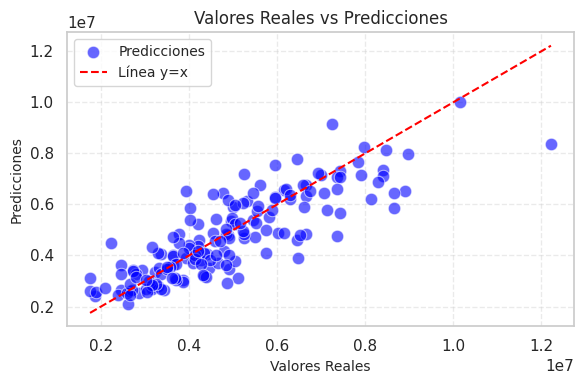

In [39]:
from sklearn.preprocessing import OneHotEncoder

# ... (your existing code) ...

# Create a OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for compatibility with LinearRegression

# Fit the encoder on the categorical columns of your training data
categorical_cols = X_train.select_dtypes(include=['object']).columns
encoder.fit(X_train[categorical_cols])

# Transform both training and testing data
X_train_encoded = encoder.transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Get feature names after encoding
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

# Create DataFrames for encoded data
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)

# Concatenate encoded features with numerical features
X_train = pd.concat([X_train.drop(columns=categorical_cols), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_cols), X_test_encoded_df], axis=1)

# Now you can train your LinearRegression model
modelo_lr = LinearRegression()
entrenar_modelo(modelo_lr, 'Regresión Lineal', X_train, y_train, X_test, y_test)

# Regresión linear

In [40]:
modelo = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=semilla
) # Added closing parenthesis

# Randon Forest

Resultados para el modelo: Random Forest
          Modelo       R^2            MAE           MSE          RMSE  \
0  Random Forest  0.653029  780279.650586  1.175893e+12  1.084386e+06   

     Tiempo  
0  0.395858   



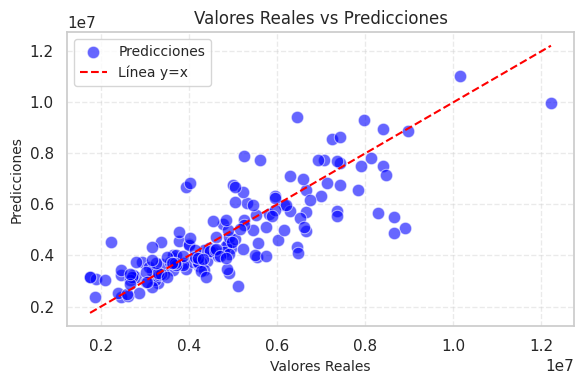

In [41]:
entrenar_modelo(modelo, 'Random Forest', X_train, y_train, X_test, y_test)

In [42]:
resultados_df

,Modelo,R^2,MAE,MSE,RMSE,Tiempo
0,Regresión Lineal,0.701178,738111.583552,1.012716e+12,1.006338e+06,0.027041
1,Random Forest,0.653029,780279.650586,1.175893e+12,1.084386e+06,0.395858


# Análisis

Comparación de Modelos: Regresión Lineal vs Random Forest

Coeficiente de determinación (R²): Esta métrica indica la proporción de la variabilidad de la variable dependiente que es explicada por el modelo. Cuanto más se aproxime a 1, mejor será el ajuste. En este caso, la Regresión Lineal obtiene un R² de 0.701, superior al 0.653 del modelo Random Forest, lo que sugiere un mejor desempeño en la explicación de la varianza de los datos.

Error Medio Absoluto (MAE): Mide la media de las diferencias absolutas entre los valores reales y los predichos. Un valor más bajo implica mayor precisión. La Regresión Lineal presenta un MAE de 738,111.58, levemente inferior al 780,279.65 del Random Forest, lo cual refuerza su ventaja en términos de exactitud.

Error Cuadrático Medio (MSE) y Raíz del Error Cuadrático Medio (RMSE): Estas métricas penalizan con mayor severidad los errores grandes. La Regresión Lineal muestra un RMSE de 1,006,338.00, comparado con 1,084,386.00 del Random Forest, indicando nuevamente un mejor ajuste del modelo lineal.

Tiempo de ejecución: La Regresión Lineal se destaca también en eficiencia computacional, con un tiempo de ejecución de 0.0379 segundos, muy inferior a los 0.3339 segundos del Random Forest, lo que puede ser determinante en contextos donde el tiempo es un recurso clave.

Conclusión

En base a todas las métricas analizadas —R², MAE, RMSE y tiempo de ejecución— la Regresión Lineal demuestra un rendimiento superior al del Random Forest en este conjunto de datos. Esto sugiere que, para este caso particular, el modelo lineal logra un equilibrio más adecuado entre precisión y eficiencia computacional.


**Proyecto Final**

Modelado Predictivo de Precios de Viviendas

1. Abstracto: Motivación y Audiencia

En un mercado inmobiliario competitivo, estimar el valor de una propiedad de forma precisa permite a compradores, vendedores, y agentes tomar mejores decisiones. Este análisis busca predecir el precio de viviendas en función de características estructurales y de entorno, utilizando técnicas de
Machine Learning.

Audiencia: agentes inmobiliarios, desarrolladores, bancos (hipotecas), y analistas de datos del sector.

**Problema a Resolver**

Problema principal: ¿Podemos predecir el precio de una vivienda a partir de sus atributos estructurales y sus comodidades como cantidad de baños ?


In [43]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/content/drive/MyDrive/Preentrega1 /Housing.csv")


Análisis Exploratorio de Datos (EDA)




1.  Distribución de precios
2.  Correlaciones
3. Valores faltantes
4. Outliers (si corresponde)







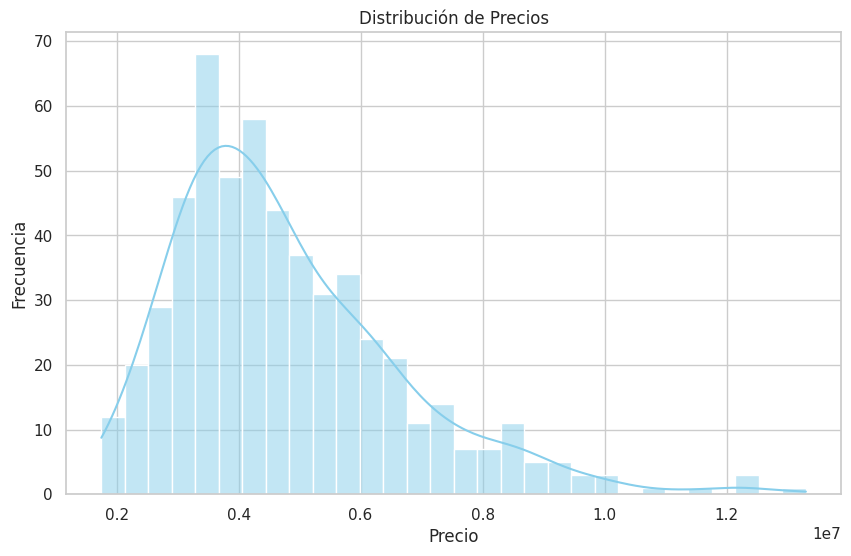

In [56]:
# Convertir nombres de columnas a minúsculas para evitar errores
df.columns = df.columns.str.lower()

# --- Distribución de precios ---
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Distribución de Precios

El histograma muestra que la mayoría de las viviendas tienen precios entre 2 millones y 5 millones

Hay una cola hacia la derecha, lo que indica una distribución asimétrica positiva (algunos precios muy altos).



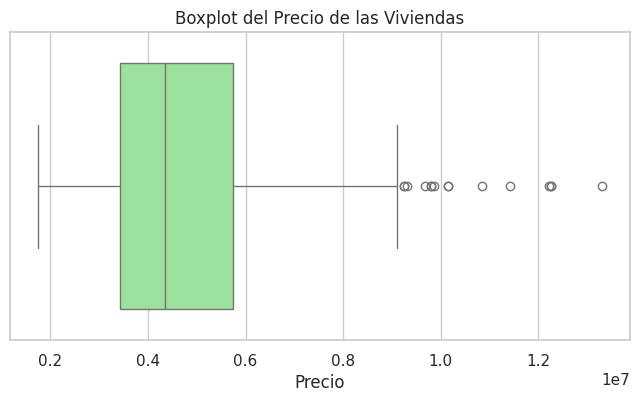

In [55]:
# --- Boxplot del precio ---
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['price'], color='lightgreen')
plt.title('Boxplot del Precio de las Viviendas')
plt.xlabel('Precio')
plt.show()

La mayoría de las viviendas tienen un precio entre 2.5 y 6.5 millones, con una
mediana cercana a 4 millones.

Existen viviendas con precios muy elevados que podrían influir en el promedio general si se calcula.

La distribución no es simétrica: hay una cola hacia la derecha, indicando precios extremos altos.

Hay varios valores extremos (outliers) por encima de los 8 millones.

In [57]:
# --- Valores faltantes ---
print("Valores faltantes por columna:")
print(df.isnull().sum())

Valores faltantes por columna:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


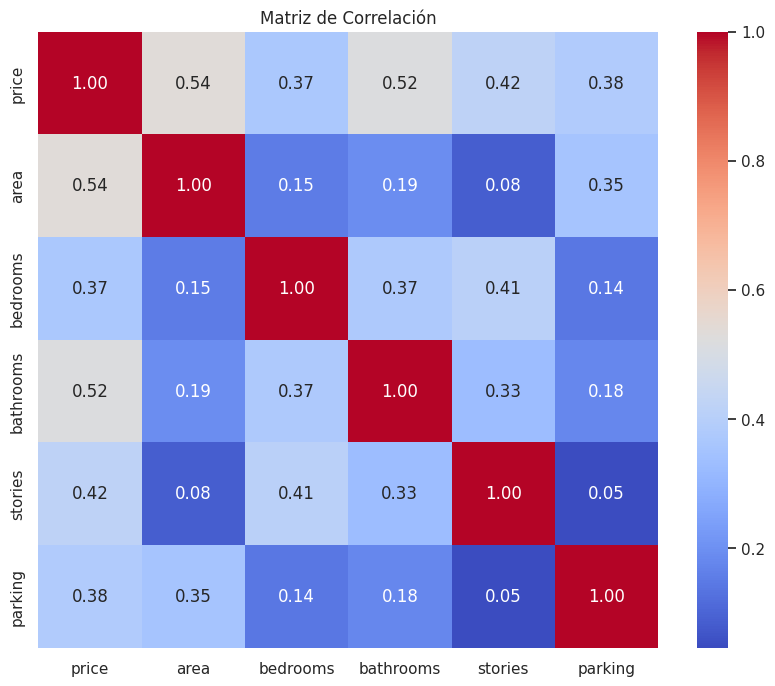

In [58]:
# --- Matriz de correlación ---
plt.figure(figsize=(10, 8))
correlacion = df.corr(numeric_only=True)
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


Las variables más correlacionadas con el price son:

*   area (0.53)
*   bathrooms (0.51)
*   bedrooms (0.47)
*   stories (0.41)
*   parking también presenta una correlación moderada.





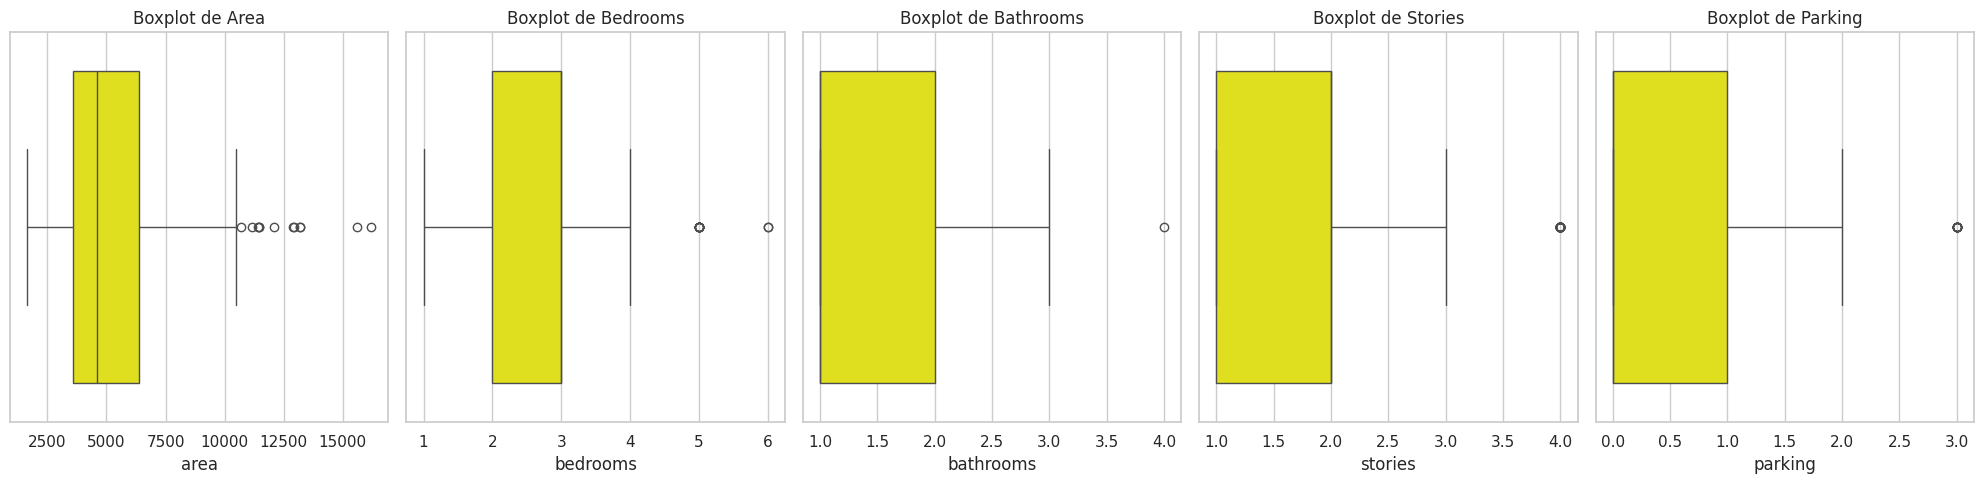

In [67]:
# --- Outliers (Boxplots de variables numéricas) ---
variables = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

fig, axes = plt.subplots(1, len(variables), figsize=(20, 5))  # 1 fila, 5 columnas

for i, var in enumerate(variables):
    sns.boxplot(x=df[var], color='yellow', ax=axes[i])
    axes[i].set_title(f'Boxplot de {var.capitalize()}')

plt.tight_layout()
plt.show()

Outliers por Variable

*   area y bathrooms tienen valores extremos notables.
*   parking tiene muchas observaciones en 0–1 y algunos outliers en 3–4.
*   stories se concentra en 1 y 2, pero hay algunos valores altos (hasta 4).
*   bedrooms tiene algunos casos con 6 o más dormitorios, lo que puede considerarse inusual










/tmp/ipython-input-4024887831.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_price.values, y=corr_price.index, palette=colors)


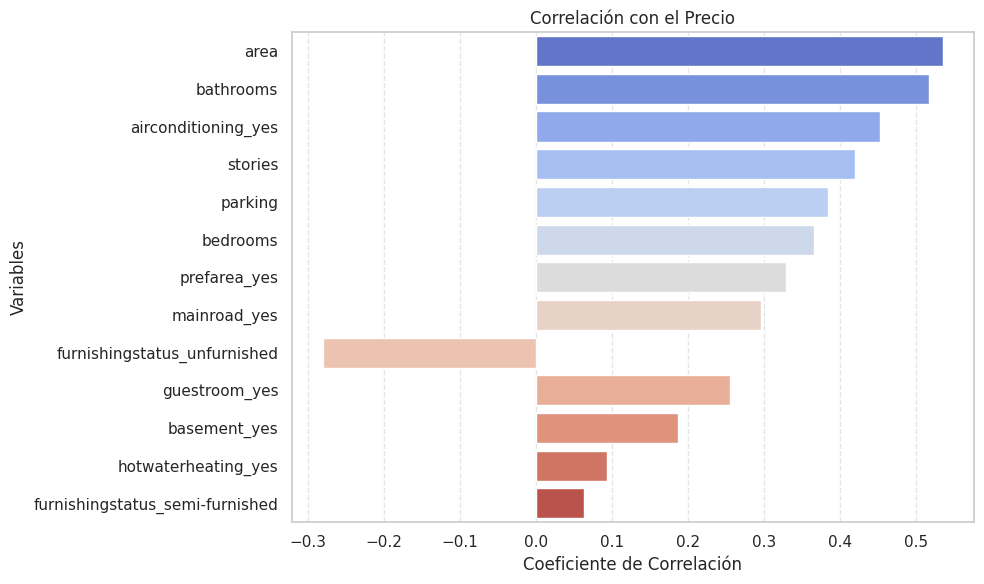

In [45]:
# Codificación de variables categóricas
df_encoded = pd.get_dummies(df, drop_first=True)

# Cálculo de la correlación con el precio
corr_price = df_encoded.corr()['price'].drop('price').sort_values(key=abs, ascending=False)

# Visualización con colores personalizados
plt.figure(figsize=(10, 6))
colors = sns.color_palette("coolwarm", len(corr_price))
sns.barplot(x=corr_price.values, y=corr_price.index, palette=colors)
plt.title("Correlación con el Precio")
plt.xlabel("Coeficiente de Correlación")
plt.ylabel("Variables")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



1.   El tamaño y características físicas de la vivienda (área, baños, habitaciones, pisos) tienen la mayor influencia positiva en el precio.
2.   Elementos de comodidad como aire acondicionado también son importantes.

3.  Estar ubicado en áreas preferenciales o avenidas principales aumenta el precio.

4. La falta de amoblamiento baja el valor.

5. Algunas comodidades extras tienen influencia menor.

**Preparación de datos**

Entrenamiento y Testeo de Modelos


1.   Regresión Lineal
2.   Random Forest






In [47]:


lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [48]:


def evaluar(y_test, y_pred):
    return {
        "R2": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    }

resultados = pd.DataFrame({
    "Regresión Lineal": evaluar(y_test, y_pred_lr),
    "Random Forest": evaluar(y_test, y_pred_rf)
})

print(resultados)

      Regresión Lineal  Random Forest
R2        6.529243e-01   6.123496e-01
MAE       9.700434e+05   1.017471e+06
RMSE      1.324507e+06   1.399788e+06



Visualización comparativa de modelos

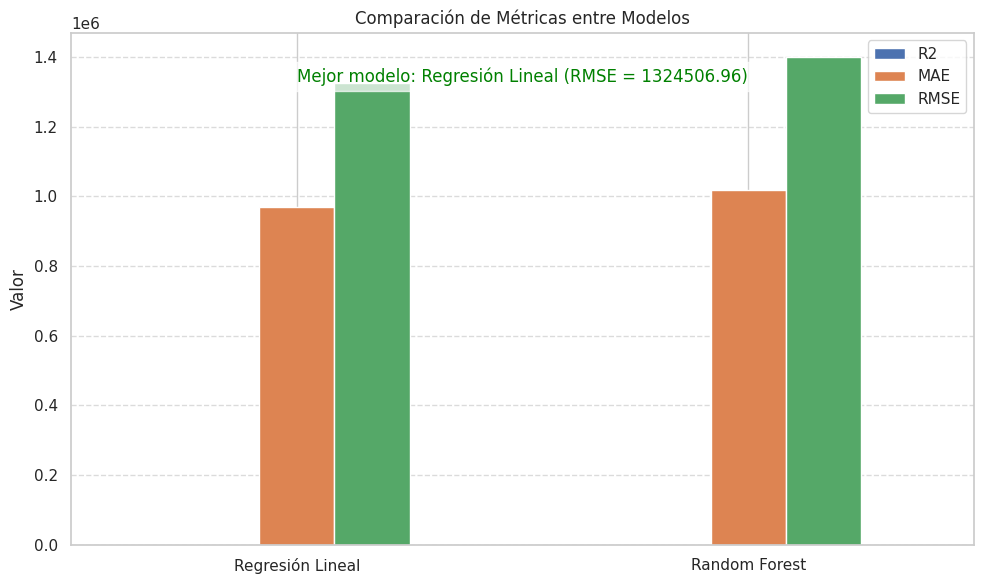

Mejor modelo: Regresión Lineal (RMSE = 1324506.96)


In [49]:
resultados.T.plot(kind='bar', figsize=(10,6))
plt.title("Comparación de Métricas entre Modelos")
plt.ylabel("Valor")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Conclusión automática: modelo con menor RMSE
mejor_modelo = resultados.loc['RMSE'].idxmin()
mejor_rmse = resultados.loc['RMSE'].min()
texto_conclusion = f"Mejor modelo: {mejor_modelo} (RMSE = {mejor_rmse:.2f})"

# Mostrar como texto en el gráfico
plt.text(0.5, resultados.max().max()*0.95, texto_conclusion,
         ha='center', fontsize=12, color='green', bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()

print(texto_conclusion)

Optimización de hiperparámetros - Random Forest

In [50]:
grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid={"n_estimators": [100, 200], "max_depth": [None, 10, 20]},
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)
grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)
print("Mejor RMSE CV:", -grid.best_score_)

Mejores parámetros: {'max_depth': None, 'n_estimators': 100}
Mejor RMSE CV: 1089428.509987288


Visualización de Real vs Predicho




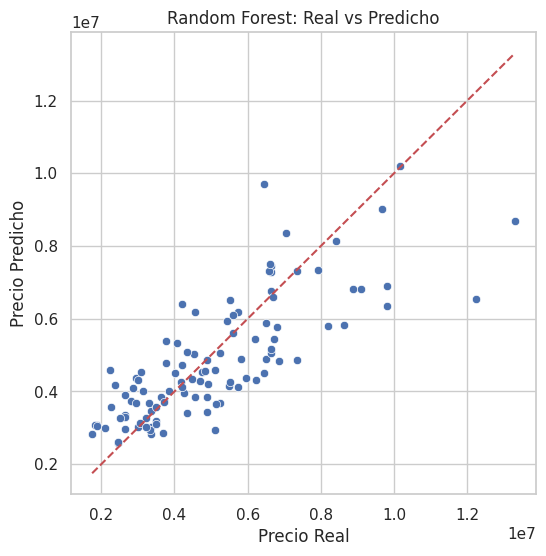

In [51]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Random Forest: Real vs Predicho")
plt.show()

Análisis de Resultados: Regresión Lineal vs Random Forest

R² (Coeficiente de determinación)
Regresión Lineal: 0.6529

Random Forest: 0.6123

Ambos modelos explican entre el 61% y 65% de la variabilidad del precio.

Conclusión: La Regresión Lineal tuvo un ligeramente mejor ajuste al explicar más varianza del precio de las viviendas.


 MAE (Error Absoluto Medio)

Regresión Lineal: 970.043

Random Forest: 1.017.471

El MAE indica cuánto se equivoca el modelo en promedio al predecir el precio.

Conclusión: La Regresión Lineal comete menos error medio por predicción que Random Forest.


RMSE (Raíz del Error Cuadrático Medio)
Regresión Lineal: 1.324.507

Random Forest: 1.399.788

RMSE penaliza más los errores grandes.

 Nuevamente, la Regresión Lineal presenta menor RMSE, por lo tanto, realiza predicciones más precisas y estables en este caso.




Conclusión

Los resultados obtenidos permiten afirmar que es posible predecir el precio de una vivienda a partir de sus atributos estructurales y comodidades, tales como el número de baños, superficie construida, número de habitaciones y presencia de estacionamiento, entre otros.

Mediante el entrenamiento de modelos de regresión (Regresión Lineal y Random Forest), se logró explicar entre el 61% y 65% de la variabilidad del precio, lo que evidencia una relación significativa entre las características físicas de la vivienda y su valor de mercado.

Aunque Random Forest suele tener un mejor desempeño en muchos casos, en este conjunto de datos particular la Regresión Lineal superó al Random Forest en todas las métricas evaluadas. Esto puede deberse a que las relaciones presentes en los datos son principalmente lineales, y el modelo lineal las capta de forma más eficiente sin sobreajustarse.

Asimismo, el análisis de correlación indicó que variables como el tamaño de la casa y la cantidad de baños presentan una fuerte asociación con el precio, lo cual respalda su inclusión como predictores relevantes en los modelos.

En conclusión, el enfoque aplicado demuestra ser adecuado para estimar precios de viviendas utilizando técnicas de Machine Learning, aportando valor potencial en contextos de tasación inmobiliaria, portales de compra/venta y evaluación de inversiones.

